# 📘 Logistic Regression - From Basics to Advanced (Simple Explanation)

---

## 1️⃣ What is Logistic Regression?

Despite the name **"Regression"**, logistic regression is actually used for **classification**, not regression.

It helps answer questions like:

- 🌧️ Will it rain today? (Yes/No)  
- 📩 Is this email spam? (Yes/No)  
- 🎓 Will a student pass or fail? (Pass/Fail)

So, it predicts **probabilities** of two outcomes - **0 or 1**.


## ⚙️ 2️⃣ Why Not Use Linear Regression?

- Linear Regression gives any value between **−∞ to +∞**  
- But in classification, we only want outputs between **0 and 1**

So, we need a way to **convert any number into a range between 0 and 1**.

That’s where the **Sigmoid Function** comes in!


## 🧮 Sigmoid Function - Graph & Deep Intuition

**Definition**
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

**Why we love it**
- Maps any real number \(z \in (-\infty, \infty)\) into a probability-like range \((0,1)\).
- Smooth, S-shaped (logistic) curve.
- Interpretable: \( \sigma(0) = 0.5 \). Values > 0.5 lean toward class 1; < 0.5 lean toward class 0.

**Key properties**
- **Asymptotes:** as \(z \to +\infty\), \(\sigma(z) \to 1\); as \(z \to -\infty\), \(\sigma(z) \to 0\).
- **Symmetry:** \(\sigma(-z) = 1 - \sigma(z)\).
- **Inflection point:** at \(z=0\) (the curve is steepest here).
- **Derivative:** 
\[
\frac{d\sigma}{dz} = \sigma(z)\big(1 - \sigma(z)\big)
\]
  - Peak slope at \(z=0\): \(\sigma(0)(1-\sigma(0)) = 0.5\times0.5 = 0.25\).
  - Far from 0, the slope gets tiny → gradients vanish.

**Odds & Logit (inverse of sigmoid)**
- **Odds:** \(\text{odds}=\dfrac{p}{1-p}\)
- **Logit:** \(\operatorname{logit}(p)=\ln\!\left(\dfrac{p}{1-p}\right)\)
- Logistic regression is linear in the **log-odds**:
\[
\operatorname{logit}(p) = w^\top x + b \quad \Longleftrightarrow \quad p = \sigma(w^\top x + b)
\]

**Interpretation tip**
- Think of \(z=w^\top x + b\) as evidence. Sigmoid squashes that evidence into a calibrated probability-like score.


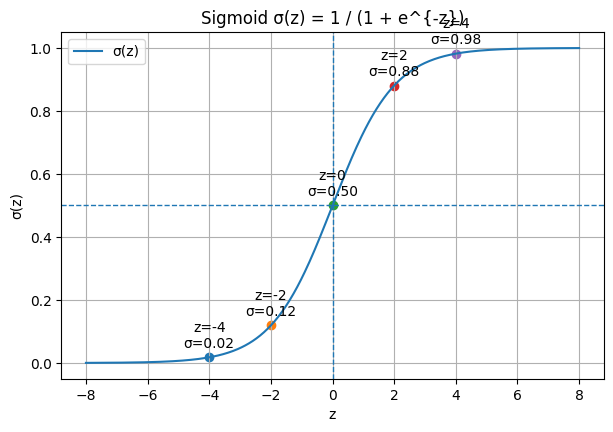

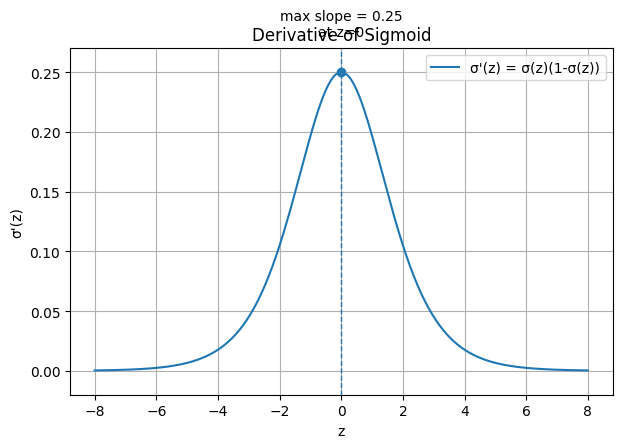

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-8, 8, 400)
s = sigmoid(z)
s_prime = s * (1 - s)  # derivative

# --- Figure 1: Sigmoid curve with landmarks ---
plt.figure(figsize=(7, 4.5))
plt.plot(z, s, label="σ(z)")
plt.axhline(0.5, linestyle="--", linewidth=1)
plt.axvline(0.0, linestyle="--", linewidth=1)

# annotate a few points
for v in [-4, -2, 0, 2, 4]:
    plt.scatter([v], [sigmoid(v)])
    plt.text(v, sigmoid(v)+0.03, f"z={v}\nσ={sigmoid(v):.2f}", ha="center")

plt.title("Sigmoid σ(z) = 1 / (1 + e^{-z})")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.show()

# --- Figure 2: Derivative of sigmoid ---
plt.figure(figsize=(7, 4.5))
plt.plot(z, s_prime, label="σ'(z) = σ(z)(1-σ(z))")
plt.axvline(0.0, linestyle="--", linewidth=1)
plt.scatter([0], [0.25])
plt.text(0, 0.25+0.03, "max slope = 0.25\nat z=0", ha="center")

plt.title("Derivative of Sigmoid")
plt.xlabel("z")
plt.ylabel("σ'(z)")
plt.ylim(-0.02, 0.27)
plt.legend()
plt.grid(True)
plt.show()


## 🔎 Reading the Plots - Deep Intuition

1) **Middle is the most decisive region**  
   Around \(z=0\), the curve is steep and σ′(z) is largest (0.25).  
   Small changes in \(z\) cause big changes in probability → the model learns most here.

2) **Extremes are “confident but stubborn”**  
   For large \(|z|\), σ(z) is near 0 or 1 and σ′(z) ≈ 0.  
   The model is already very confident; gradients vanish → weights update slowly.

3) **Threshold at 0.5**  
   Since σ(0)=0.5, the decision boundary in logistic regression is when \(w^\top x + b = 0\).  
   Crossing this line flips the predicted class.

4) **Calibration intuition**  
   - \(z=2\) → σ≈0.88: “pretty strong” evidence for class 1  
   - \(z=4\) → σ≈0.98: “very strong” evidence for class 1  
   - \(z=-2\) → σ≈0.12: “pretty strong” evidence for class 0

5) **Why logs in the loss**  
   Cross-entropy’s \(\log\) terms penalize overconfident mistakes harshly.  
   If σ(z) ≈ 0 but true label is 1, loss is huge. This pushes the model to fix bad, confident predictions.


## 🧠 4️⃣ The Logistic Regression Model

We compute a linear combination of inputs:

\[
z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
\]

Then we apply the sigmoid:

\[
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-(w \cdot x + b)}}
\]

**Prediction Rule:**

- If \( \hat{y} > 0.5 \) → predict **1**  
- If \( \hat{y} \le 0.5 \) → predict **0**


## 🎯 5️⃣ What Does Logistic Regression Actually Learn?

It learns the best **weights (w)** and **bias (b)** so that the predicted probabilities \( \hat{y} \)
are as close as possible to the true labels \( y \).

To measure how close the predictions are, we use a **Loss Function**.


## ⚡ 6️⃣ The Loss Function - Cross-Entropy (Log Loss)

The **Cross-Entropy Loss** is defined as:

\[
L = -[y \log(\hat{y}) + (1 - y)\log(1 - \hat{y})]
\]

👉 It **penalizes wrong predictions more heavily** when the model is confident but incorrect.

The model adjusts **weights (w, b)** using **Gradient Descent** to minimize this loss.


## ⚙️ 7️⃣ Training the Model - Gradient Descent

In simple words:

1. Start with random weights.  
2. Calculate the loss (how wrong the model is).  
3. Compute how the loss changes if we adjust weights (gradients).  
4. Move weights slightly to reduce the loss.  
5. Repeat until the loss is minimum.

This iterative process is called **Gradient Descent Optimization**.
